

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

>I chose TMDb movie dataest it contains 10866 row and 21 column. I'll go through the data analysis process so, I can come up with  intresting relationship in the dataset. 

### Qestions:
>1.What is the relationship between revenue  and popularity ?

>2.Do most of the movies profit have more or less than the avarge ? 

>3.Which type of gener is the most frequent ?

>4.What year has the most number of movies ?


In [1]:
#import packages and 'magic word'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>Here I'll get to know the  structure of the dataset so, I'll be familiar with it  

### General Properties

In [2]:
#Loading dataset and see the column headers

df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>See the general statistics measures


In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>Check the data type kinds that I have

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>Counting how many rows and columns

In [5]:
df.shape

(10866, 21)


### Data Cleaning (Cleaning and Removing data )

### Processes:
>1.Removing the unused columns

>2.Cleaning the null values
 
>3.Removing zeros values 

>Since these columns I'll not use it in my analysis it's better to remove it so, the investigation will be much easier!

In [6]:
#Dropping the unused columns

df.drop(['imdb_id','homepage','overview','tagline','cast','keywords'], axis=1,inplace=True)
df.head() 

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>Checking that the columns are dropped

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

>Cleaning the null values because it may effect the analysis later on

In [8]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9807 non-null   int64  
 1   popularity            9807 non-null   float64
 2   budget                9807 non-null   int64  
 3   revenue               9807 non-null   int64  
 4   original_title        9807 non-null   object 
 5   director              9807 non-null   object 
 6   runtime               9807 non-null   int64  
 7   genres                9807 non-null   object 
 8   production_companies  9807 non-null   object 
 9   release_date          9807 non-null   object 
 10  vote_count            9807 non-null   int64  
 11  vote_average          9807 non-null   float64
 12  release_year          9807 non-null   int64  
 13  budget_adj            9807 non-null   float64
 14  revenue_adj           9807 non-null   float64
dtypes: float64(4), int64

>Checking the zeros valuse in the dataset

In [9]:
df.isin([0]).sum()

id                         0
popularity                 0
budget                  4777
revenue                 5054
original_title             0
director                   0
runtime                   13
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              4777
revenue_adj             5054
dtype: int64

>We have zero valuse in the budget,revenue,budget_adj,revenue_adj and runtime 
>Usually when we have null value in an numirc type we substituted with mean,medain,global constant or ignoring the tupleIn this case we do not have null values just zero values and from my point of view I see that these zero values will effect the anaylsis so, it better to remove the  budget,revenue,budget_adj and revenue_adj



>Removing budget zero values and by default it will remove the budget_adj  becaues the zero values in the same tuple


In [10]:
Zero_Values = df[ df['budget'] == 0 ]
df.drop(Zero_Values.index, axis=0 , inplace = True)
df.isin([0]).sum()

id                         0
popularity                 0
budget                     0
revenue                 1222
original_title             0
director                   0
runtime                    1
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj             1222
dtype: int64

>Removing revenue zero values and by default it will remove the revenue_adj  becaues the zero values in the same tuple


In [11]:
Zero_Values = df[ df['revenue'] == 0 ]
df.drop(Zero_Values.index, axis=0 , inplace = True)
df.isin([0]).sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

>Taking last look that everthing is good

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3808 non-null   int64  
 1   popularity            3808 non-null   float64
 2   budget                3808 non-null   int64  
 3   revenue               3808 non-null   int64  
 4   original_title        3808 non-null   object 
 5   director              3808 non-null   object 
 6   runtime               3808 non-null   int64  
 7   genres                3808 non-null   object 
 8   production_companies  3808 non-null   object 
 9   release_date          3808 non-null   object 
 10  vote_count            3808 non-null   int64  
 11  vote_average          3808 non-null   float64
 12  release_year          3808 non-null   int64  
 13  budget_adj            3808 non-null   float64
 14  revenue_adj           3808 non-null   float64
dtypes: float64(4), int64

# <a id='eda'></a>
## Exploratory Data Analysis

### 1. What is the relationship between revenue  and popularity ?

>As we can see here it seems that there is a positve correlation between revenue  and popularity also, few outliers points

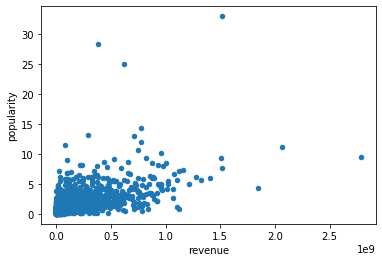

In [13]:
#Using scatter plot to make it more clear 
df.plot(x='revenue', y='popularity',kind='scatter') 

### 2. Do most of the movies profit have more or less than the avarge ? 

>I chose to calculate the profit instead of the budget or revenue because this is what I exploring in my analysis the net profit it will be more cleaier than budget or revenue

In [14]:
#Calculating the profit and adding it as new column

profit= df['revenue']- df['budget']
df['profit'] = profit 
df

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Mike Nichols,131,Drama,Chenault Productions,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08,26236689
10828,5780,0.402730,3000000,13000000,Torn Curtain,Alfred Hitchcock,128,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07,10000000
10829,6644,0.395668,4653000,6000000,El Dorado,Howard Hawks,120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07,1347000
10835,5923,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08,8000000


In [15]:
df.profit.mean()

71300764.16150211

>I notice that most of moives have profit less than the profit avarage 

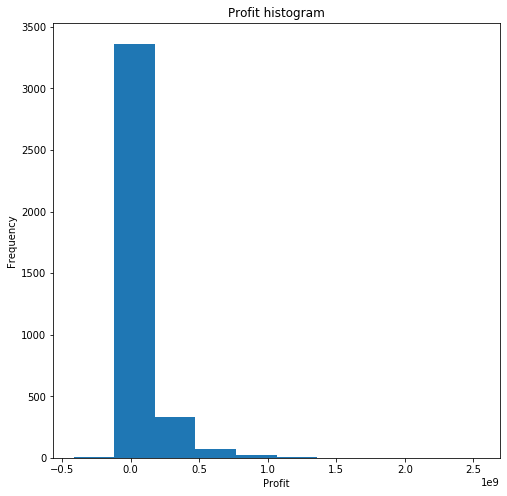

In [16]:
df['profit'].plot(kind='hist',figsize=(8,8));
plt.title("Profit histogram");
plt.xlabel('Profit');
plt.ylabel("Frequency");

>This boxplot illustrate that the profit has many outliers 

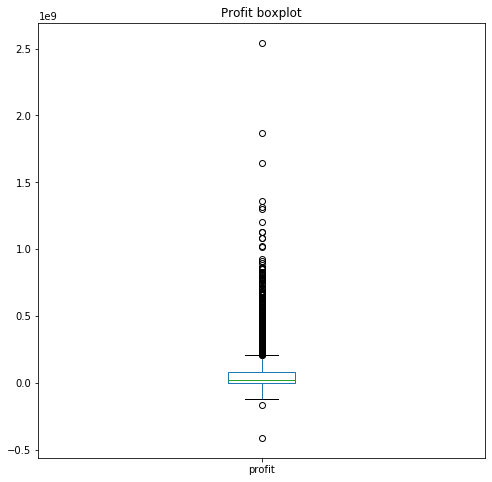

In [17]:
df['profit'].plot(kind='box',figsize=(8,8));
plt.title("Profit boxplot");

### 3. Which type of gener is the most frequent ?

>Here to know the type of gener that we have I used dummy method 

In [18]:
Gener_Type=df['genres'].str.get_dummies(sep='|')
Gener_Type

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10828,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
10829,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10835,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


>I observed that drama and comedy type of gener are the most frequent

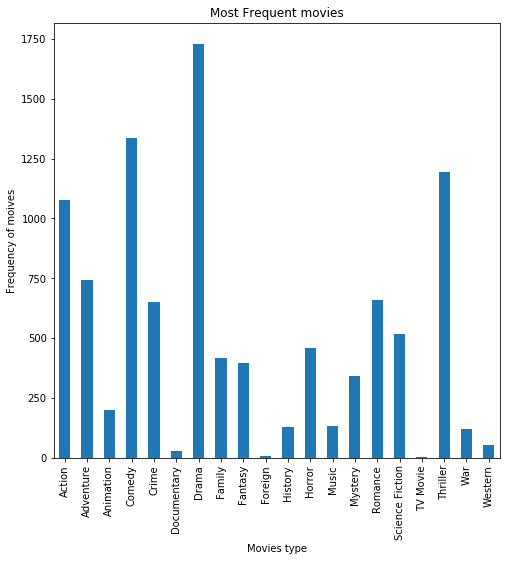

In [19]:
Gener_Type.sum().plot(kind='bar',x='genres',y='profit',figsize=(8,8));
plt.title("Most Frequent movies");
plt.xlabel('Movies type');
plt.ylabel("Frequency of moives");

### 4. What year has the most number of movies ?

>Like what we see here as the years progress, the number of movies increases

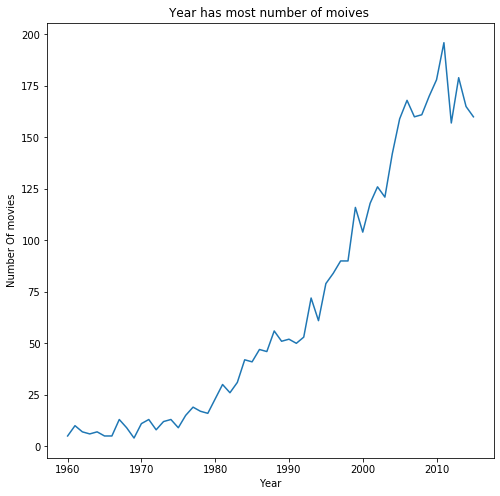

In [20]:
df.groupby('release_year').count()['id'].plot(figsize=(8,8));
plt.title("Year has most number of moives ");
plt.xlabel('Year');
plt.ylabel('Number Of movies');

<a id='conclusions'></a>
## Conclusions

> In conclusion, first I asked questions regarding the dataset to come up with useful anaylsis. Then, I started discovering the structure of the dataset. After that cleaning the data so, it will be easier to deal with. Second part was about exploring the data which I can considerd it the main part. In this part, I discuss the kind of relationship I have between revenue  and popularity. Also, if most of the movies profit have more or less than the avarge profit. Moreover, Which type of gener is the most frequent so, maybe we can notice the direction of what the people like. Finally, I obesrved that the more  years progress the more number of movies increases.

>Limitation: I think there were many zero values in revenue and budget which may effect the anaylsis so, I had to remove the also, there is no description for dataset attraibutes even in the sourece (kaggle) of the dataset so, It took time to understand it.  